# Exercices 
## Détection des galaxies par corrélation
On va chercher à détecter dans une image de fond de ciel, les galaxies présentes. Pour cela, on va supposer qu'une galaxie possède une forme circulaire que l'on pourra modéliser par la fonction psf suivante:

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import match_template, peak_local_max
from skimage import exposure
from skimage.filters import threshold_otsu
from scipy import ndimage as ndi

In [79]:
x, y = np.meshgrid(np.linspace(-1,1,50), np.linspace(-1,1,50))
d = np.sqrt(x*x + y*y)
sigma, mu = 1.0, 0.0
psf = np.exp(-((d - mu)**2 / (2*sigma**2)))

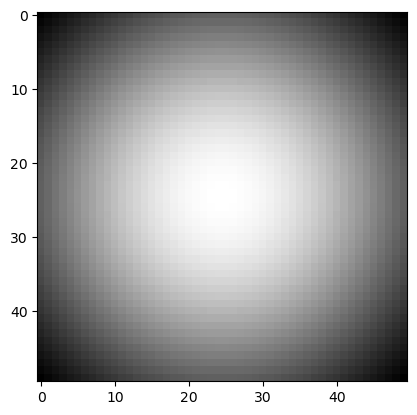

In [80]:
plt.imshow(psf, cmap = 'gray')

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import match_template, peak_local_max
from skimage import color, data
from scipy import ndimage as ndi

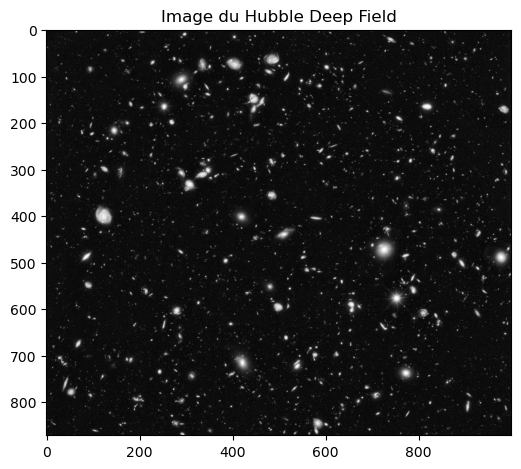

In [82]:
img_color = data.hubble_deep_field() 
img_gray = color.rgb2gray(img_color)

plt.figure(figsize=(6,6))
plt.title("Image du Hubble Deep Field")
plt.imshow(img_gray, cmap='gray')
plt.show()

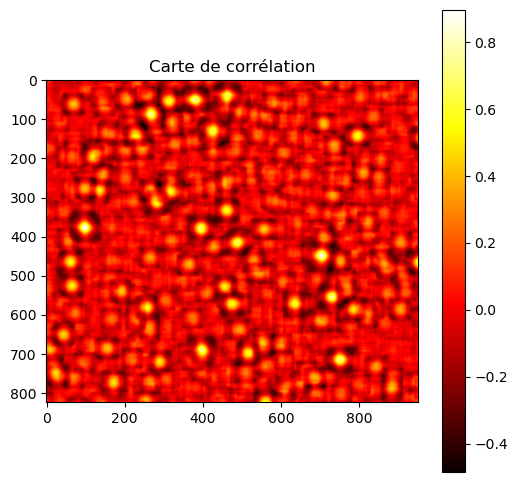

In [83]:
corr = match_template(img_gray, psf)

plt.figure(figsize=(6,6))
plt.title("Carte de corrélation")
plt.imshow(corr, cmap='hot')
plt.colorbar()
plt.show()

In [84]:
coords = peak_local_max(
    corr,
    min_distance=10,    
    threshold_rel=0.5    
)

print("Nombre de galaxies détectées :", len(coords))

Nombre de galaxies détectées : 32


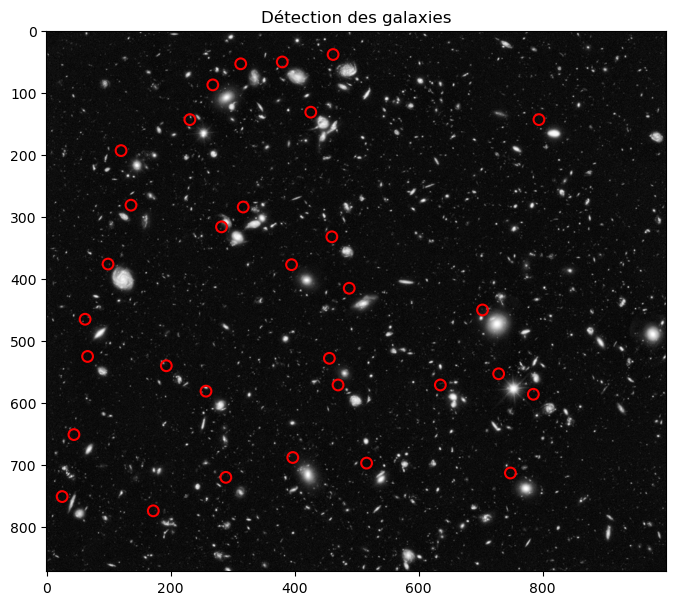

In [85]:
plt.figure(figsize=(8,8))
plt.imshow(img_gray, cmap='gray')
plt.scatter(
    coords[:,1],  # x
    coords[:,0],  # y
    s=60, edgecolor='red', facecolor='none', linewidth=1.5
)
plt.title("Détection des galaxies")
plt.show()


## Transformée de Fourier
Beaucoup de méthodes de traitement d'images utilisent la transformée de Fourier.
1. Calculez et visualisez la transformée de Fourier de la composante rouge de l'image fond_de_ciel (**fond_de_ciel_crop_rouge**). Commentez.
2. Chargez et visualisez l'image **image_galaxies.npy** (au format numpy) et comparez à l'image  **fond_de_ciel_crop_rouge**. 
3. Calculez et visualisez la transformée de Fourier de l'image **image_galaxies.npy**. Commentez.

1. Calculez et visualisez la transformée de Fourier de la composante rouge de l'image fond_de_ciel (**fond_de_ciel_crop_rouge**). Commentez.

In [86]:
import skimage
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

In [87]:
fond_de_ciel = data.hubble_deep_field()
fond_de_ciel_crop = fond_de_ciel[0:512, 0:512, :]
fond_de_ciel_crop_rouge = fond_de_ciel_crop[:, :, 0].astype(float)


In [88]:
# Transformée de Fourier
F = np.fft.fft2(fond_de_ciel_crop_rouge)
F_shift = np.fft.fftshift(F)


In [89]:
# Spectre de magnitude 
magnitude = np.log1p(np.abs(F_shift))

In [90]:
# Spectre de phase
phase = np.angle(F_shift)

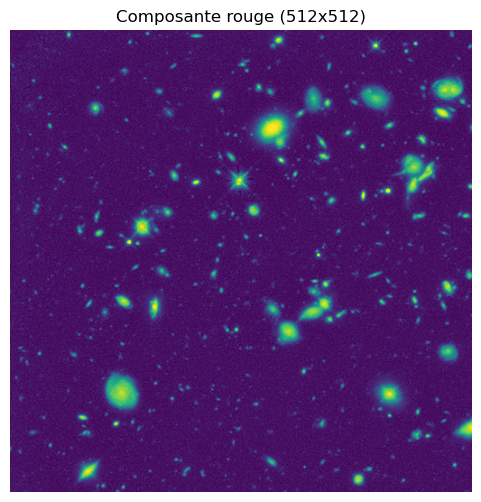

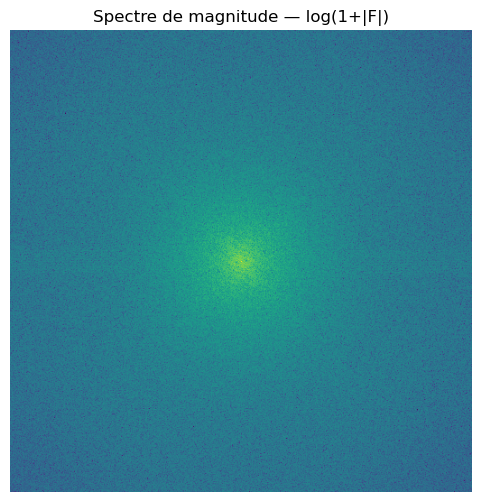

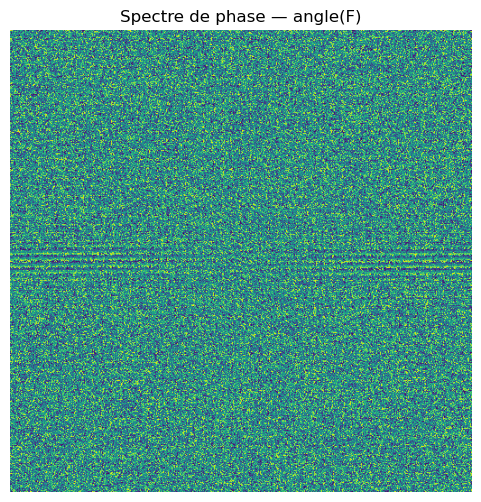

In [91]:
# Affichages 
plt.figure(figsize=(6,6))
plt.imshow(fond_de_ciel_crop_rouge)
plt.title("Composante rouge (512x512)")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(magnitude)
plt.title("Spectre de magnitude — log(1+|F|)")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(phase)
plt.title("Spectre de phase — angle(F)")
plt.axis('off')
plt.show()


Commentez

-La transformée de Fourier de la composante rouge montre que la majorité de l’énergie est concentrée au centre, ce qui correspond aux basses fréquences .
-Les hautes fréquences, plus éloignées du centre, représentent les détails fins comme les étoiles et les contours.
-La phase contient l’information de position des structures, indispensable pour reconstruire correctement l’image.
-L’utilisation de l’échelle logarithmique permet de visualiser à la fois les basses et hautes fréquences.

2. Chargez et visualisez l'image **image_galaxies.npy** (au format numpy) et comparez à l'image  **fond_de_ciel_crop_rouge**. 

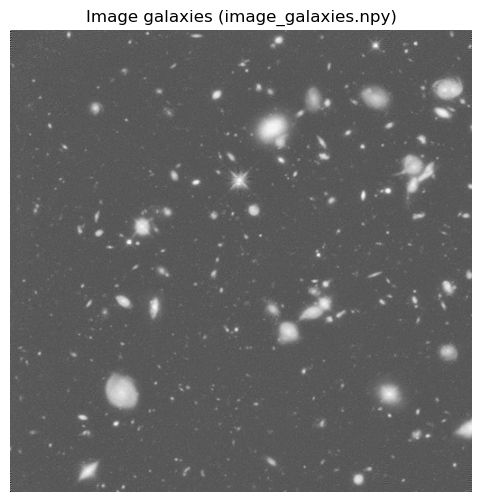

In [92]:
image_galaxies = np.load("image_galaxies.npy")

plt.figure(figsize=(6,6))
plt.imshow(image_galaxies, cmap='gray')
plt.title("Image galaxies (image_galaxies.npy)")
plt.axis('off')
plt.show()

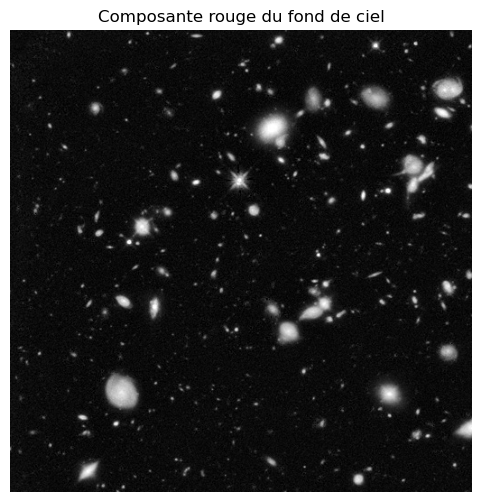

In [93]:
fond_de_ciel = data.hubble_deep_field()
fond_de_ciel_crop = fond_de_ciel[0:512, 0:512, :]
fond_de_ciel_crop_rouge = fond_de_ciel_crop[:, :, 0]

plt.figure(figsize=(6,6))
plt.imshow(fond_de_ciel_crop_rouge, cmap='gray')
plt.title("Composante rouge du fond de ciel")
plt.axis('off')
plt.show()

Comparaison

Image fond de ciel (rouge) :

Beaucoup d’étoiles et de détails fins.

Distribution aléatoire des objets lumineux.

Image galaxies :

Contient probablement des galaxies plus grandes et moins nombreuses.

Les structures sont plus étendues et moins ponctuelles.

3. Calculez et visualisez la transformée de Fourier de l'image **image_galaxies.npy**. Commentez.

In [94]:
# Transformée de Fourier 2D
F = np.fft.fft2(image_galaxies)
F_shift = np.fft.fftshift(F)

In [95]:
# Spectre de magnitude 
magnitude = np.log1p(np.abs(F_shift))

# Spectre de phase
phase = np.angle(F_shift)

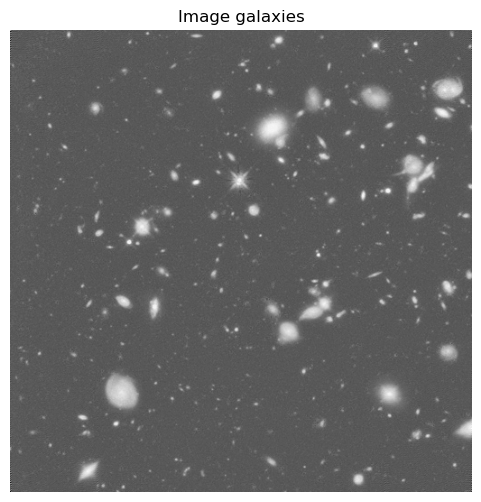

In [96]:
# Affichage de l'image originale
plt.figure(figsize=(6,6))
plt.imshow(image_galaxies, cmap='gray')
plt.title("Image galaxies")
plt.axis('off')
plt.show()

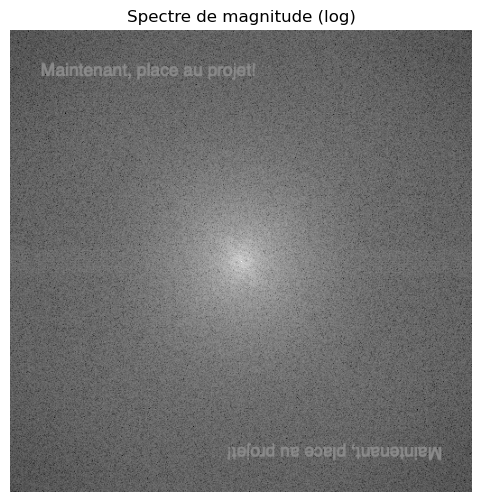

In [97]:
# Affichage du spectre de magnitude
plt.figure(figsize=(6,6))
plt.imshow(magnitude, cmap='gray')
plt.title("Spectre de magnitude (log)")
plt.axis('off')
plt.show()

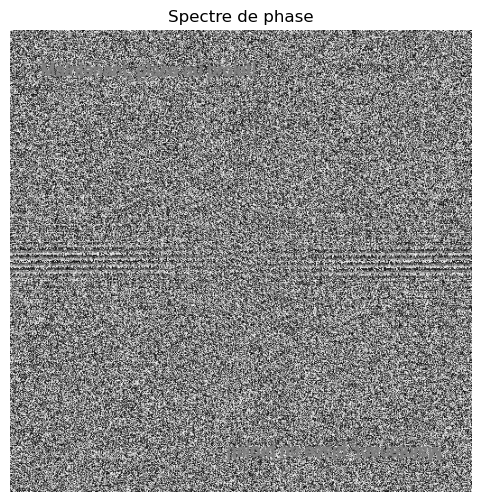

In [98]:
# Affichage du spectre de phase
plt.figure(figsize=(6,6))
plt.imshow(phase, cmap='gray')
plt.title("Spectre de phase")
plt.axis('off')
plt.show()

Commentaire

-La transformée de Fourier montre que la majorité de l’énergie est concentrée au centre, ce qui correspond aux basses fréquences et aux grandes structures des galaxies.
-Les hautes fréquences sont faibles, car il y a peu de détails fins par rapport au fond de ciel rempli d’étoiles.
La phase contient la position et la forme des galaxies, essentielle pour reconstruire l’image.